In [78]:
# 共通で利用するライブラリ
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option("display.max_columns", None)
plt.style.use('seaborn')
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'IPAexGothic'
%matplotlib inline

# 追加するライブラリ
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

## Ch.02 データを可視化して分析を行う

- データ分析とはどのようなものか
- どうすればデータを読み解いていけるか
- データを可視化する技術

データ一覧

- order_data.csv
  - Ch.01で作成した注文データ

### Knock11: データを読み込んで不要なものを除外する

In [79]:
# order_data.csvの読み込み

order_data = pd.read_csv("../output_data/order_data.csv")
print(order_data.shape)
display(order_data)

(703880, 16)


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払い済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703875,90872494,191,C35992970,46,51884378,2020-06-30 21:58:58,2020-06-30 22:43:58,1,2112,1,伊勢崎店,GU,北関東,群馬,お持ち帰り,お支払い済
703876,30167637,35,C53126526,88,6295273,2020-06-30 21:58:58,2020-06-30 22:36:58,0,4462,2,代々木店,TK,東京,東京,デリバリー,お渡し済
703877,85345862,118,C25099070,32,15733308,2020-06-30 21:58:58,2020-06-30 22:42:58,0,3865,2,磯子店,KN,神奈川,神奈川,デリバリー,お渡し済
703878,73038887,100,C27421314,84,67608099,2020-06-30 21:58:58,2020-06-30 22:21:58,0,3319,2,中原店,KN,神奈川,神奈川,デリバリー,お渡し済


In [80]:
# データの絞り込み
# status = 0: 受付
# status = 1: お支払済み
# status = 2: お渡し済
# status = 9: キャンセル

order_data = order_data.loc[
    (order_data["status"] == 1) | (order_data["status"] == 2)
]
print(order_data.shape)
order_data.columns

(574436, 16)


Index(['order_id', 'store_id', 'customer_id', 'coupon_cd', 'sales_detail_id',
       'order_accept_date', 'delivered_date', 'takeout_flag', 'total_amount',
       'status', 'store_name', 'area_cd', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name'],
      dtype='object')

In [81]:
# 不要な項目の削除
# 分析用データの作成

analyze_data = order_data[[
    "store_id", "customer_id", "coupon_cd",
    "order_accept_date", "delivered_date",
    "total_amount", 
    "store_name", "wide_area", "narrow_area",
    "takeout_name", "status_name"
]]
print(analyze_data.shape)
display(analyze_data)

(574436, 11)


,store_id,customer_id,coupon_cd,order_accept_date,delivered_date,total_amount,store_name,wide_area,narrow_area,takeout_name,status_name
0,49,C26387220,50,2020-04-01 11:00:00,2020-04-01 11:18:00,4144,浅草店,東京,東京,お持ち帰り,お支払い済
1,85,C48773811,26,2020-04-01 11:00:00,2020-04-01 11:22:00,2877,目黒店,東京,東京,デリバリー,お渡し済
2,76,C66287421,36,2020-04-01 11:00:00,2020-04-01 11:15:00,2603,本郷店,東京,東京,デリバリー,お渡し済
3,190,C41156423,19,2020-04-01 11:00:00,2020-04-01 11:16:00,2732,栃木店,北関東,栃木,デリバリー,お渡し済
4,191,C54568117,71,2020-04-01 11:00:00,2020-04-01 11:53:00,2987,伊勢崎店,北関東,群馬,デリバリー,お渡し済
...,...,...,...,...,...,...,...,...,...,...,...
703875,191,C35992970,46,2020-06-30 21:58:58,2020-06-30 22:43:58,2112,伊勢崎店,北関東,群馬,お持ち帰り,お支払い済
703876,35,C53126526,88,2020-06-30 21:58:58,2020-06-30 22:36:58,4462,代々木店,東京,東京,デリバリー,お渡し済
703877,118,C25099070,32,2020-06-30 21:58:58,2020-06-30 22:42:58,3865,磯子店,神奈川,神奈川,デリバリー,お渡し済
703878,100,C27421314,84,2020-06-30 21:58:58,2020-06-30 22:21:58,3319,中原店,神奈川,神奈川,デリバリー,お渡し済


### Knock12: データの全体像を把握する

In [82]:
# 分析用データの統計量

analyze_data.describe()

,store_id,coupon_cd,total_amount
count,574436.000,574436.000,574436.000
mean,99.114,49.479,2960.088
std,55.914,28.889,954.283
min,1.000,0.000,698.000
25%,51.000,24.000,2308.000
50%,99.000,49.000,2808.000
75%,147.000,75.000,3617.000
max,196.000,99.000,5100.000


In [83]:
# 分析データのデータ型の表示

analyze_data.dtypes

store_id              int64
customer_id          object
coupon_cd             int64
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [84]:
# 分析データのデータ型の修正

analyze_data[["store_id", "coupon_cd"]] = analyze_data[["store_id", "coupon_cd"]].astype(str)
analyze_data.dtypes

store_id             object
customer_id          object
coupon_cd            object
order_accept_date    object
delivered_date       object
total_amount          int64
store_name           object
wide_area            object
narrow_area          object
takeout_name         object
status_name          object
dtype: object

In [85]:
# 分析用データの統計量

analyze_data.describe()

,total_amount
count,574436.000
mean,2960.088
std,954.283
min,698.000
25%,2308.000
50%,2808.000
75%,3617.000
max,5100.000


### Knock13: 月別の売上を集計する

In [86]:
# ["order_accept_date"]を日時型に変換する

analyze_data["order_accept_date"] = pd.to_datetime(analyze_data["order_accept_date"])

In [87]:
# ["order_accept_month"]を追加する

analyze_data["order_accept_month"] = analyze_data["order_accept_date"].dt.strftime("%Y%m")
display(analyze_data[["order_accept_date", "order_accept_month"]])

,order_accept_date,order_accept_month
0,2020-04-01 11:00:00,202004
1,2020-04-01 11:00:00,202004
2,2020-04-01 11:00:00,202004
3,2020-04-01 11:00:00,202004
4,2020-04-01 11:00:00,202004
...,...,...
703875,2020-06-30 21:58:58,202006
703876,2020-06-30 21:58:58,202006
703877,2020-06-30 21:58:58,202006
703878,2020-06-30 21:58:58,202006


In [88]:
# ["delivered_date"]を日時型に変換する

analyze_data["delivered_date"] = pd.to_datetime(analyze_data["delivered_date"])

# ["order_accept_month"]を追加する
analyze_data["delivered_month"] = analyze_data["delivered_date"].dt.strftime("%Y%m")
display(analyze_data[["delivered_date", "delivered_month"]])

,delivered_date,delivered_month
0,2020-04-01 11:18:00,202004
1,2020-04-01 11:22:00,202004
2,2020-04-01 11:15:00,202004
3,2020-04-01 11:16:00,202004
4,2020-04-01 11:53:00,202004
...,...,...
703875,2020-06-30 22:43:58,202006
703876,2020-06-30 22:36:58,202006
703877,2020-06-30 22:42:58,202006
703878,2020-06-30 22:21:58,202006


In [89]:
# 分析データのデータ型を確認

analyze_data.dtypes

store_id                      object
customer_id                   object
coupon_cd                     object
order_accept_date     datetime64[ns]
delivered_date        datetime64[ns]
total_amount                   int64
store_name                    object
wide_area                     object
narrow_area                   object
takeout_name                  object
status_name                   object
order_accept_month            object
delivered_month               object
dtype: object

In [90]:
# 月別の統計データ

month_data = analyze_data.groupby("order_accept_month")
display(month_data)
display(month_data.describe())

total_amount                                             \
                          count     mean     std     min      25%      50%   
order_accept_month                                                           
202004               189414.000 2959.441 954.271 698.000 2308.000 2808.000   
202005               195684.000 2960.328 954.823 698.000 2308.000 2808.000   
202006               189338.000 2960.486 953.740 698.000 2308.000 2808.000   

                                      
                        75%      max  
order_accept_month                    
202004             3586.000 5100.000  
202005             3586.000 5100.000  
202006             3617.000 5100.000

In [91]:
# 月別データの統計データ（合計）

month_data.sum()

,total_amount
order_accept_month,
202004,560559489
202005,579288785
202006,560532581


### Knock14: 月別の推移を可視化する

<AxesSubplot:xlabel='order_accept_month'>

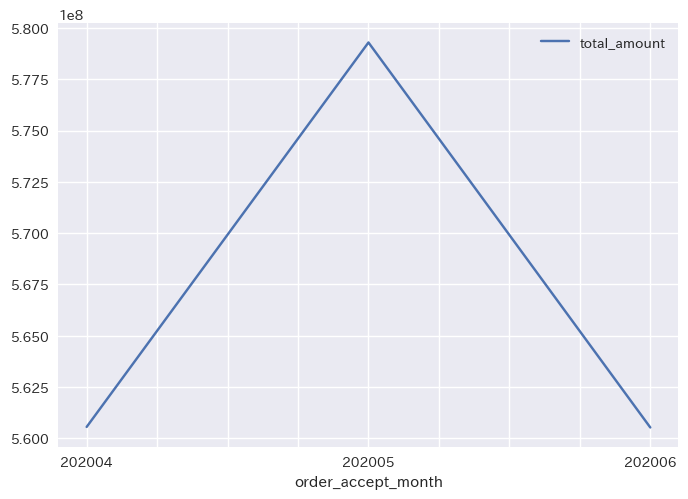

In [92]:
# 月別の売上合計の推移

month_data.sum().plot()

<AxesSubplot:xlabel='order_accept_month'>

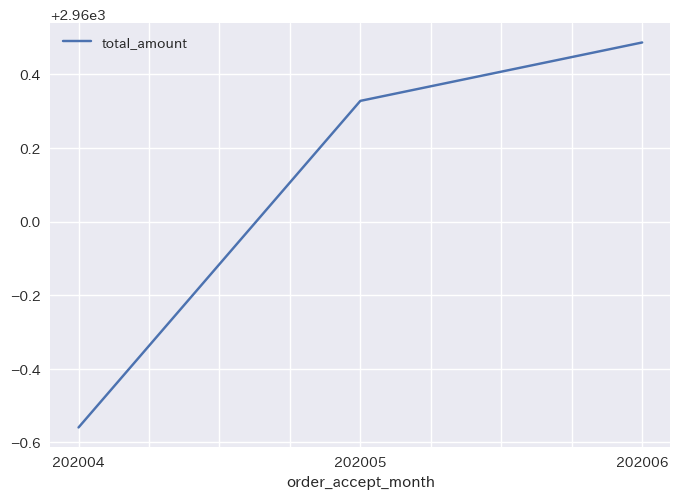

In [93]:
# 月別の平均額の推移

month_data.mean().plot()

### Knock15: 売上からヒストグラムを作成する

(array([ 21524.,      0.,  48969., 135664., 111217.,  77622.,  54146.,
         59814.,  34394.,  31086.]),
 array([ 698. , 1138.2, 1578.4, 2018.6, 2458.8, 2899. , 3339.2, 3779.4,
        4219.6, 4659.8, 5100. ]),
 <BarContainer object of 10 artists>)

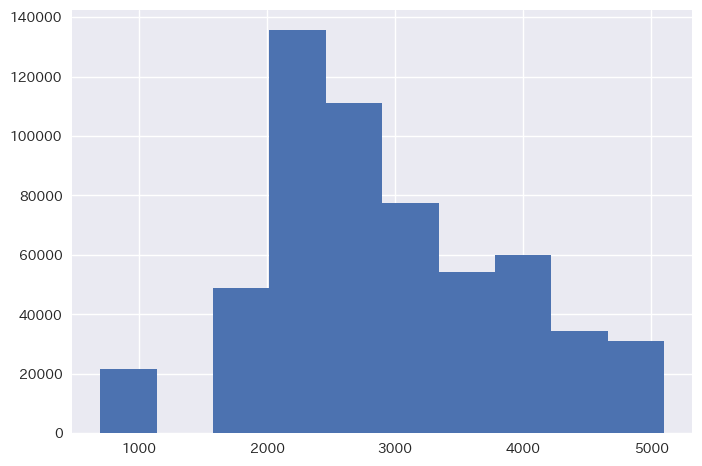

In [94]:
# ["total_amount"]のヒストグラム

plt.hist(analyze_data["total_amount"])

(array([10728., 10796.,     0.,     0.,     0., 48969., 45777., 78334.,
        23175., 66451., 44368., 38745., 27653., 42503., 12508., 35285.,
        23739., 11151., 23168., 22649.,  8437.]),
 array([ 698.   ,  907.619, 1117.238, 1326.857, 1536.476, 1746.095,
        1955.714, 2165.333, 2374.952, 2584.571, 2794.19 , 3003.81 ,
        3213.429, 3423.048, 3632.667, 3842.286, 4051.905, 4261.524,
        4471.143, 4680.762, 4890.381, 5100.   ]),
 <BarContainer object of 21 artists>)

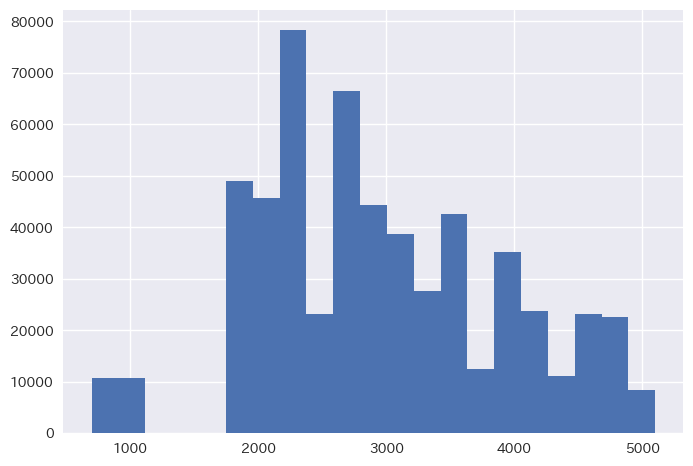

In [95]:
# ["total_amount"]のヒストグラム（ビンを変更）

plt.hist(analyze_data["total_amount"], bins=21)


### Knock16: 都道府県別の売上を集計して可視化する

- 月別かつトド府県別の売上
- ピボットテーブルを使ったクロス集計

In [96]:
# 都道府県別の月次売上のテーブル

pre_data = pd.pivot_table(
    analyze_data,
    index="order_accept_month",
    columns="narrow_area",
    values="total_amount",
    aggfunc="mean"
)
display(pre_data)

narrow_area,千葉,埼玉,東京,栃木,神奈川,群馬,茨城
order_accept_month,,,,,,,
202004,2959.062,2976.520,2960.592,2992.174,2948.001,2942.047,2947.480
202005,2953.546,2977.291,2962.603,2998.166,2949.597,2948.270,2941.797
202006,2955.762,2976.988,2962.950,2991.543,2950.520,2945.505,2935.952


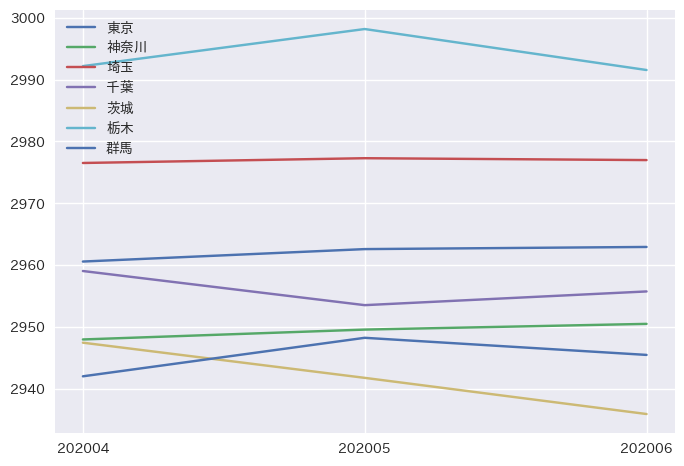

In [97]:
# 都道府県別の月次売上のグラフ

plt.plot(list(pre_data.index), pre_data["東京"], label="東京")
plt.plot(list(pre_data.index), pre_data["神奈川"], label="神奈川")
plt.plot(list(pre_data.index), pre_data["埼玉"], label="埼玉")
plt.plot(list(pre_data.index), pre_data["千葉"], label="千葉")
plt.plot(list(pre_data.index), pre_data["茨城"], label="茨城")
plt.plot(list(pre_data.index), pre_data["栃木"], label="栃木")
plt.plot(list(pre_data.index), pre_data["群馬"], label="群馬")
plt.legend()
plt.show()

### Knock17: クラスタリングに向けてデータを加工する

In [98]:
# 店舗別の統計量

store_clustering = analyze_data.groupby("store_id").agg(
    ["size", "mean", "median", "max", "min"]
)["total_amount"]
store_clustering

,size,mean,median,max,min
store_id,,,,,
1,2877,3129.835,3050.000,5100,1857
10,2294,2989.004,2677.000,5100,698
100,3776,2947.170,2808.000,5100,698
101,1740,3074.770,2877.000,4744,1899
102,2760,2845.662,2791.000,4744,698
...,...,...,...,...,...
95,3360,3063.215,2852.000,5100,939
96,2865,2942.726,2808.000,4692,698
97,3382,3010.939,2808.000,5100,939


In [99]:
# indexの振り直し
store_clustering.reset_index(inplace=True, drop=True)
print(store_clustering.shape)
display(store_clustering)

(196, 5)


,size,mean,median,max,min
0,2877,3129.835,3050.000,5100,1857
1,2294,2989.004,2677.000,5100,698
2,3776,2947.170,2808.000,5100,698
3,1740,3074.770,2877.000,4744,1899
4,2760,2845.662,2791.000,4744,698
...,...,...,...,...,...
191,3360,3063.215,2852.000,5100,939
192,2865,2942.726,2808.000,4692,698
193,3382,3010.939,2808.000,5100,939
194,2763,3016.826,2987.000,5100,698


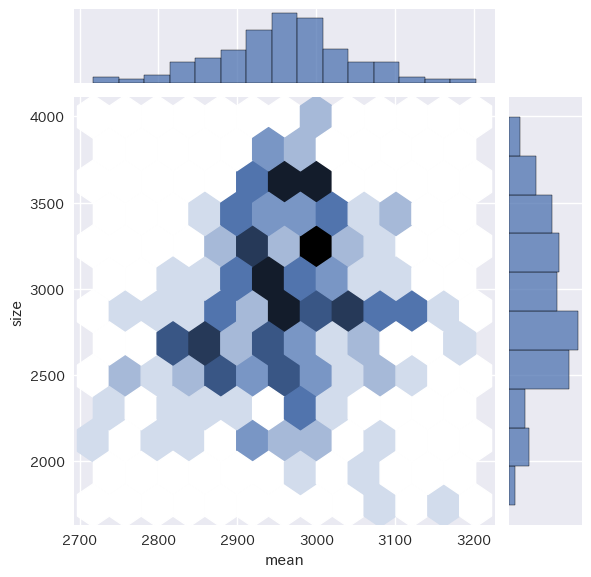

In [100]:
# 店舗の分布（六角形ビニング）

hexbin = sns.jointplot(
    data=store_clustering, 
    x="mean", y="size",
    kind="hex"
)

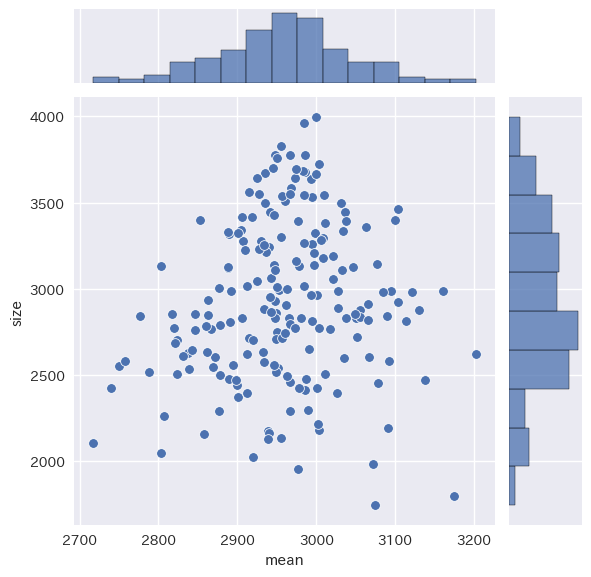

In [101]:
# 店舗の分布（散布図）

hexbin = sns.jointplot(
    data=store_clustering,
    x="mean", y="size",
    kind="scatter"
)

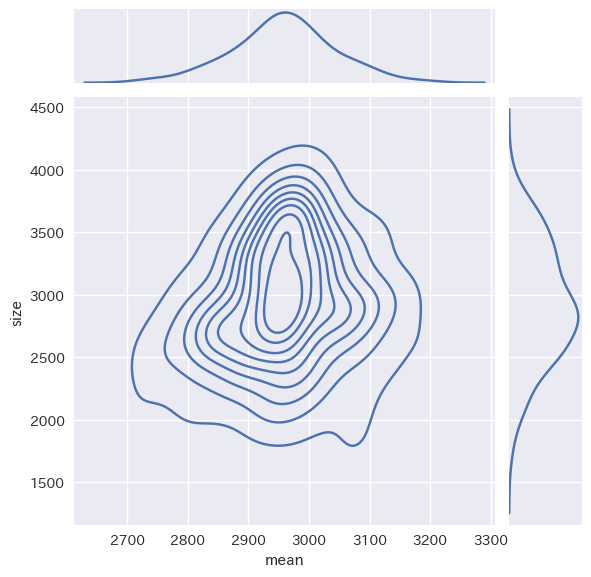

In [102]:
# 店舗の分布（密度）

hexbin = sns.jointplot(
    data=store_clustering,
    x="mean", y="size",
    kind="kde"
)


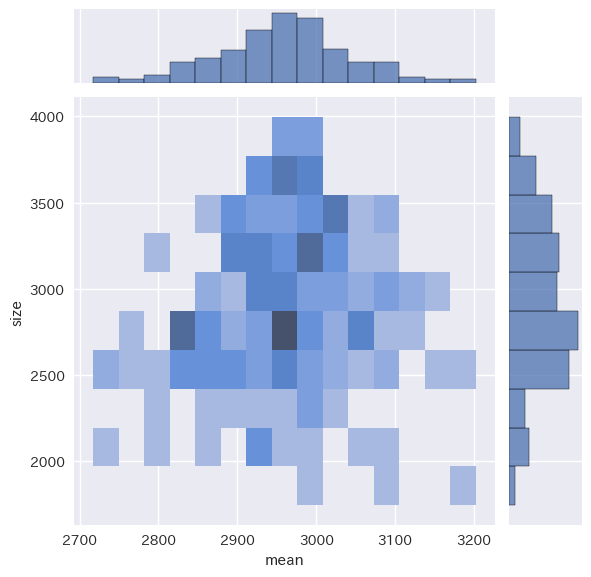

In [103]:
# 店舗の分布（ビンベース）

hexbin = sns.jointplot(
    data=store_clustering,
    x="mean", y="size",
    kind="hist"
)


### Knock18: クラスタリングで店舗をグループ化する

In [104]:
# クラスタリング

# 標準化
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

# クラスタ数とランダムシードの定義
kmeans = KMeans(n_clusters=4, random_state=0)
# モデルの構築
clusters = kmeans.fit(store_clustering_sc)
# クラスタリングの結果の格納
store_clustering["cluster"] = clusters.labels_

print(store_clustering["cluster"].unique())
display(store_clustering)

[2 0 1 3]


,size,mean,median,max,min,cluster
0,2877,3129.835,3050.000,5100,1857,2
1,2294,2989.004,2677.000,5100,698,0
2,3776,2947.170,2808.000,5100,698,1
3,1740,3074.770,2877.000,4744,1899,2
4,2760,2845.662,2791.000,4744,698,0
...,...,...,...,...,...,...
191,3360,3063.215,2852.000,5100,939,1
192,2865,2942.726,2808.000,4692,698,0
193,3382,3010.939,2808.000,5100,939,1
194,2763,3016.826,2987.000,5100,698,3


### Knock19: グループの傾向を分析する

In [105]:
# グループごとの件数

store_clustering.columns = [
    "月内件数", "月内平均値", "月内中央値", "月内最大値", "月内最小値", "cluster"
]
store_clustering.groupby("cluster").count()

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,68,68,68,68,68
1,90,90,90,90,90
2,14,14,14,14,14
3,24,24,24,24,24


In [106]:
# グループごとの金額の内訳

store_clustering.groupby("cluster").mean()

,月内件数,月内平均値,月内中央値,月内最大値,月内最小値
cluster,,,,,
0,2607.412,2886.666,2726.029,4756.485,744.074
1,3274.322,2967.131,2797.700,5076.267,740.844
2,2514.643,3071.596,2880.429,4896.571,1882.071
3,2801.583,3063.533,3009.375,5023.667,758.250


### Knock20: クラスタリングの結果をt-SNEで可視化する

- 次元削減の手法
  - t-SNE

In [107]:
# t-SNEでの可視化

# t-SNEの定義
# 2次元までの次元削減を指定
tsne = TSNE(n_components=2, random_state=0)
# モデルの構築
# 2次元に削減された値が格納される
x = tsne.fit_transform(store_clustering_sc)
tsne_df = pd.DataFrame(x)
tsne_df["cluster"] = store_clustering["cluster"]
tsne_df.columns = ["axis_0", "axis_1", "cluster"]

display(tsne_df)

,axis_0,axis_1,cluster
0,1.366,-10.755,2
1,-2.219,4.828,0
2,7.764,5.306,1
3,-1.098,-11.555,2
4,-13.833,-10.739,0
...,...,...,...
191,6.967,0.029,1
192,-10.264,-10.453,0
193,7.565,1.243,1
194,3.227,-3.189,3


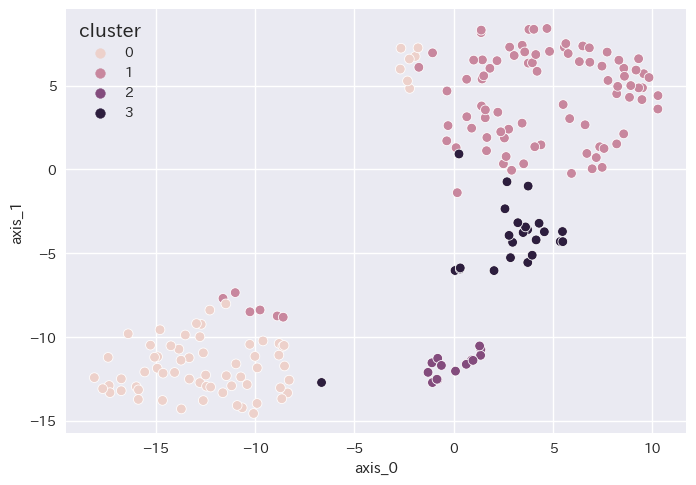

In [108]:
# 次元削減（t-SNE）したデータを散布図で可視化

tsne_graph = sns.scatterplot(
    x="axis_0", y="axis_1", hue="cluster", data=tsne_df
)